# <font color="darkblue"> Prática 01: Perceptron Learning Algorithm (PLA) </font>




**Objetivos:**


*   Entender o funcionamento do PLA e dos componentes de aprendizagem.
*   Fixar o conceito de aprendizagem.



**Descrição:**

Crie uma dataset $D$ com 1000 pontos e uma função alvo $f$ para compreender o funcionamento do PLA. Para visualizar os passos do algoritmo, considere $d=2$ e assuma $X=[-1,1]\times[-1,1]$, em que $x\in X$ é escolhido com probabilidade uniforme. Escolha uma reta como função alvo, em que um lado da reta seja mapeado para $+1$ e o outro para $-1$. Gere então pontos aleatórios $x_i$ e obtenha sua classificação $y_i$ a partir da função alvo. Divida os dados em um grupo de treinamento e outro de teste.

Após a preparação dos dados, crie uma função $PLA()$ que inicia com os pesos todos iguais a zero e, a cada iteração, deixe o algoritmo escolher aleatoriamente um dos pontos com classificação incorreta até que ele convirja. Rode o PLA sobre amostras com $N=10$ e $N=100$, teste a hipótese solução a partir de pontos diferentes (conjunto de teste) daqueles das amostras e responda a seguinte questão:

- Qual o percentual de pontos classificados corretamente para cada hipótese solução?










# <font color="darkblue"> Solução </font>


###  Preparação dos dos dados

O objetivo da prepação dos dados é a criação da função alvo e do dataset conforme a descrição do problema. Para tanto, você deve realizar os seguintes passos:

* Crie a função alvo (uma reta) a partir de dois pontos gerados aleatoriamente;
* Calcule o coeficiente angular e o coeficiente linear (bias) e os armazene em variáveis distintas;
* Gere aleatoriamente 1000 pontos, cujas coordenadas estão no intervalo $[-1,1]$, e os adicione em uma lista $X$ correspondendo aos dados da amostra;
* Para cada ponto gerado, use a função sign() de numpy, que recebe como entrada uma reta (função alvo), para obter a classificação de cada ponto. Adicione cada classificação em uma lista $y$.


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output 






In [56]:
# Criar pontos aleatorios para gerar a reta

def cria_pontos(quant):
  lista =[]
  for _ in range(quant):

    x = random.randint(0,200)
    x = (-100 + x)/100
    y = random.randint(0,200)
    y = (-100 + y)/100
    d = [x,y]
    lista.append(d)
    
  return lista


In [57]:
# Gerando a reta a partir dos pontos gerados acima
def criar_reta():
  
  ponto1,ponto2 = cria_pontos(2)
  
  #m = y2 - y1 / x2 - x1
  
  if ponto1[0]>ponto2[0]:
    
    m = (ponto1[1]-ponto2[1]) / (ponto1[0]-ponto2[0])
  else:
    m = (ponto2[1]-ponto1[1]) / (ponto2[0]-ponto1[0])
    
  n = ponto1[0] * m - ponto1[1]
  n*=-1
  pontos = (ponto1,ponto2)
  
  return pontos,m,n



In [58]:
# Gerando o target a partir da função signal

def criar_o_vetor_y_que_nao_e_o_y_do_ponto(X,m,b):
  
  lista_y = []
  
  for ponto in X:
    lista_y.append(np.sign(ponto[1]-m*ponto[0]-b))
    
  return(lista_y)

### Visualizando o dataset
Use a função abaixo para visualizar o dataset criado anteriormente.

In [59]:
def show_dataset(X, y, p1, p2, m, b):
    """
    Esta função tem o objetivo de exibir na tela uma amostra do dataset passado por parâmetro.

    Paramêtros:
    - X (matriz): Matriz 1000x2 correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde
    às coordenadas dos pontos gerados.
    - y (list): resultasdo da classificação
    - p1 (list): Coordenadas do ponto p1 gerado para criar a função alvo.
    - p2 (list): Coordenadas do ponto p2 gerado para criar a função alvo.
    - m (float): Coeficiente angular da função alvo.
    - b (float): Coeficidnte linear da função alvo.
    """

    line = np.linspace(-1, 1, 1000)
    plt.plot(line, m*line + b, label="f(x)", c="green")

    print(p1)

    # Pontos usados na criacao da reta
    plt.scatter(p1[0], p1[1], c='green')
    plt.scatter(p2[0], p2[1], c='green')

    for i in range(len(X[:200])):
        if (y[i] == 1):
            plt.scatter(X[i][0], X[i][1], c='blue')
        else:
            plt.scatter(X[i][0], X[i][1], c='red')

    plt.show()

### Algoritmo PLA
Complete a função PLA() abaixo para implementar o Algoritmo de Aprendizagem do Perceptron conforme os slides da aula de "Significado de aprendizagem".

![Logo](PLA.jpg)

### Função para visualização dos passos do PLA
A função abaixo é uma função auxiliar que permite que vocês enxerguem o resultado de cada iteração da função PLA().

In [60]:
%matplotlib inline
def plot_grafico(X, y, w, f):
    """
    Esta função objetiva a visualização dos passos do PLA.

    Paramêtros:
    - X (list[]): Matriz 1000x2 correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - w (list): Lista correspondendo aos pesos do perceptron.
    - f (list): Lista de dois elementos correspondendo, respectivamente, aos coeficientes angular e linear
    da função alvo.
    """

    nPontos = len(X)
    #matplotlib.use('TkAgg')

    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

    plt.axis([-1, 1, -1, 1])

    x_plt = [X[i][0] for i in range(nPontos)]
    y_plt = [X[i][1] for i in range(nPontos)]

    for i in range(nPontos):
        if (y[i] == 1):
            plt.scatter(x_plt[i], y_plt[i], s=10, c='blue')
        else:
            plt.scatter(x_plt[i], y_plt[i], s=10, c='red')

    x = np.linspace(-1, 1, 1000)
    plt.plot(x, f[0]*x + f[1], c='green') # f[0] = m, f[1] = b
    plt.plot(x, (-w[0] - w[1]*x) / w[2], c='orange') # A*x + B*y + C => y = (-C - A*x) / B
    clear_output(wait=True)
    plt.show(block=False)
    plt.pause(0.01)


### Função para construir lista de pontos classificados incorretamente
Implemente a função abaixo para contruir a lista de pontos classificados incorretamente em cada iteração do loop principal da função PLA().


In [61]:
def constroiListaPCI(X, y, w):
    """
    Esta função constrói a lista de pontos classificados incorretamente.

    Paramêtros:
    - X (list[]): Matriz 1000x2 correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - w (list): Lista correspondendo aos pesos do perceptron.

    Retorno:
    - l (list): Lista com os pontos classificador incorretamente.
    - new_y (list): Nova classificação de tais pontos.

    """
    
    l = []
    new_y = []
    
    
    
    #print(X[0],w,y[0])
    for i in range(len(X)):
        if  np.sign( w[0] + w[1]*X[i][0] + w[2]*X[i][1]) != y[i]:
            #print(np.sign( w[0] + w[1]*X[i][0] + w[2]*X[i][1]),y[i])
            l.append(X[i])
            new_y.append(y[i])

    

    return l, new_y

In [62]:
def PLA(X, y, f):
    """
    Esta função corresponde ao Algoritmo de Aprendizagem do modelo Perceptron.

    Paramêtros:
    - X (list[]): Matriz 1000x2 correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - f (list): Lista de dois elementos correspondendo, respectivamente, aos coeficientes angular e linear
    da função alvo.

    Retorno:
    - it (int): Quantidade de iterações necessárias para corrigir todos os pontos classificados incorretamente.
    - w (list): Lista de três elementos correspondendo aos pesos do perceptron.
    """
    listaPCIX = X.copy()
    listaPCIY = y.copy()    
    w = [0,0,0]
    it = 0
    
    
    
    #listaPCIX = np.float64(listaPCIX)
    #listaPCIY = np.float64(listaPCIY)
    #w = np.float64(w)
    
    
    while (len(listaPCIX) > 0):
        
        i = random.randint(0,len(listaPCIX)-1)
        
        w[0] = w[0] + listaPCIY[i]
        w[1] = w[1] + listaPCIY[i]*listaPCIX[i][0]
        w[2] = w[2] + listaPCIY[i]*listaPCIX[i][1]
        
        listaPCIX, listaPCIY = constroiListaPCI(X, y, w)
        

        # Após atualizar os pesos para correção do ponto escolhido, você irá chamar a função plotGrafico()
        plot_grafico(X, y, w, f)
        it += 1

    return it, w

In [63]:
def ConferePonto(x, pesos):
    """Prever a classe de um ponto usando os pesos do Perceptron."""
    return np.sign(x[0] * pesos[0] + x[1] * pesos[1] + pesos[2])

In [64]:
def CriarDados(n):
    #n = tamanho da amostra
    X = cria_pontos(n)
    vetor, m, b = criar_reta()
    p1 = vetor[0]
    p2 = vetor[1]
    Y = criar_o_vetor_y_que_nao_e_o_y_do_ponto(X, m, b)
    show_dataset(X, Y, p1, p2, m, b)
    return X, Y, [m, b]
    

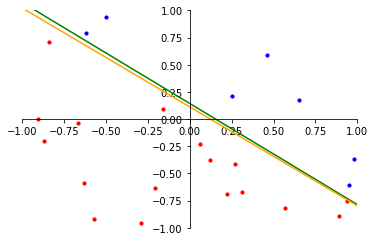

In [65]:
r = CriarDados(24)
print(r[2])
qtdIter, Pesos = PLA(r[0], r[1], r[2])


In [66]:
def ContaErros(X, y, w):
    erros = 0
    for i in range(len(X)):
        if  np.sign( w[0] + w[1]*X[i][0] + w[2]*X[i][1]) != y[i]:
            erros += 1
    return erros

### Calculando a acurácia

Treine o Modelo de Aprendizagem de Máquina Perceptron com subamostras de tamanhos $N=10$ e $N = 100$, conforme o enunciado, e em seguida verifique acurácia do modelo com uma subamostra de teste que contém pontos diferentes das subamostras utilizadas para treinamento.

#### Criando Base de dados 

In [67]:
X_test = cria_pontos(1000)

[0.4, -0.09]


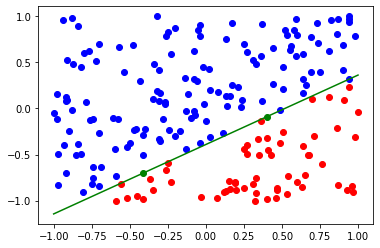

In [68]:
vetor, m, b = criar_reta()
p1 = vetor[0]
p2 = vetor[1]
Y = criar_o_vetor_y_que_nao_e_o_y_do_ponto(X_test, m, b)
show_dataset(X_test, Y, p1, p2, m, b)

#### Testes 

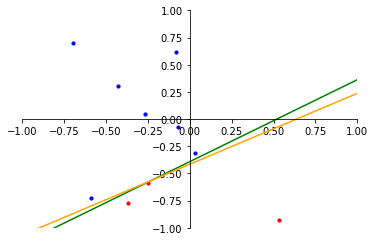

In [69]:
rtreino = X_test[0:10]
itTreino, PesosTreino = PLA(rtreino, Y[0:10], [m, b])



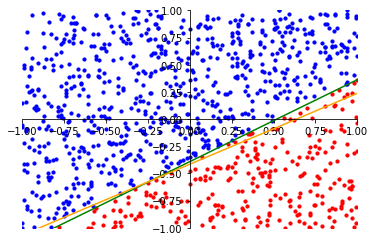

In [70]:
plot_grafico(X_test, Y, PesosTreino, [m, b])

In [71]:
# Calcular Acurácia

print("Qtd de Iterações: ", qtdIter)
print("Pesos: ", Pesos)
acuracia = 1 - (ContaErros(X_test, Y, PesosTreino) / len(X_test))
print("Acurácia: ", acuracia)

Qtd de Iterações:  119
Pesos:  [-1.0, 8.149999999999993, 8.969999999999995]
Acurácia:  0.978


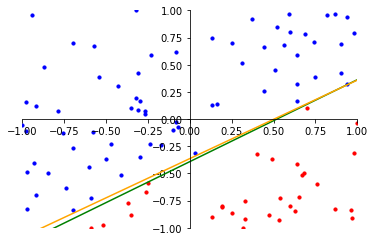

In [72]:
rtreino = X_test[0:100]
itTreino, PesosTreino = PLA(rtreino, Y[0:100], [m, b])

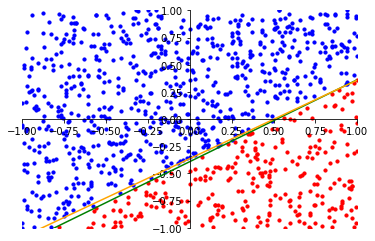

In [73]:
plot_grafico(X_test, Y, PesosTreino, [m, b])

In [74]:
# Calcular Acurácia

print("Qtd de Iterações: ", qtdIter)
print("Pesos: ", Pesos)
acuracia = 1 - (ContaErros(X_test, Y, PesosTreino) / len(X_test))
print("Acurácia: ", acuracia)

Qtd de Iterações:  119
Pesos:  [-1.0, 8.149999999999993, 8.969999999999995]
Acurácia:  0.99
